<div><div style="text-align:left;display:inline-block;float:left"><code>Eduardo Cardenas</code></div> <div style="text-align:right;display:inline-block;float:right"><code>Computación Científica - UNMSM</code></div></div>
<hr width=100% align=center>
<h1 style="text-align:center">Método Explícito - Ecuación del Calor</h1>

Vamos aplicar este método a la ecuación del calor:

$$
\begin{cases}
 \dfrac{\partial u}{\partial t} = c^2 \dfrac{\partial^2 u}{\partial x^2} & \text{para } (x,t) \in (a,b)\times(0,T)\\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = f(x) & \text{para } x\in(a,b)    \\
 u(a,t) = 0 = u(b,t)  & \text{para } t\in(0,T)
\end{cases} 
$$

Denotamos la siguiente partición:
$$h = \frac{b-a}{m}, \qquad k = \frac{T}{n} \quad \mbox{tal que} \quad x_{i+1} = x_i + h, \qquad t_{j+1} = t_j + k $$

Utilizamos la siguiente notación :
$$ w_{i,j} = u(x_i,t_j) $$

### Formulas para aproximar las derivadas parciales
Este método se caracteriza por utilizar las siguientes formulas:


$$ \frac{\partial u}{\partial t} \simeq \frac{w_{i,j+1} - w_{i,j}}{k}$$

$$ \frac{\partial u}{\partial x} \simeq \frac{w_{i+1,j} -2w_{i,j} + w_{i-1,j}}{h^2}$$

### Ahora encontremos la fórmula para el Método Explícito
Conocidas las aproximaciones de las derivadas parciales , reemplazemos sus aproximaciones en la ecuación del calor y luego procederemos a encontrar una formula que nos permita aproximar $w_{i,j+1}$

$$\frac{w_{i, j+1} - w_{i, j}}{k} = c^2 \frac{w_{i+1, j} - 2w_{i,j} + w_{i-1, j}}{h^2}$$
sea $\lambda = \dfrac{c^2k}{h^2}$ :
$$w_{i, j+1} - w_{i, j} = \lambda w_{i+1, j} -2\lambda w_{i,j} + \lambda w_{i-1, j}$$

<p>
<span id="eq01" style="float:right;">(1)</span>
$$w_{i, j+1} = \lambda w_{i-1, j} + (1 - 2\lambda)w_{i,j} + \lambda w_{i+1,j}$$
</p>

expresamos esta formula matricialmente :

$$ 
\left( \begin{array}{c}
        w_{1,j+1}  \\
        w_{2,j+1}  \\
        w_{3,j+1}  \\
        \vdots   \\
        w_{m-1,j+1}\\
       \end{array}
\right)  = \left( \begin{array}{ccccc}
        1-2\lambda & \lambda    & 0          & \cdots  & 0          \\
        \lambda    & 1-2\lambda & \lambda    & \cdots  & 0          \\
        0          & \lambda    & 1-2\lambda & \cdots  & 0          \\
        \vdots     & \vdots     & \vdots     & \ddots  & \lambda   \\
        0          & 0          & 0          & \lambda & 1-2\lambda \\        
        \end{array}
\right) \left( \begin{array}{c}
       w_{1,j}  \\
       w_{2,j}  \\
       w_{3,j}  \\
       \vdots     \\
       w_{m-1,j}\\
       \end{array}
\right)       
$$

<p>
<span id="eq02" style="float:right;">(2)</span>
$$w^{( j+1 )} = Aw^{( j )}$$
</p>

Podemos usar la ecuación <a style="text-decoration:none;" href="#eq01">(1)</a> o  <a style="text-decoration:none;" href="#eq02">(2)</a> para hallar una solucion aproximada de $u(x,t)$,

### Codigo en Python 

Utilizando la ecuación <a style="text-decoration:none;" href="#eq01">(1)</a> : 

In [3]:
import numpy as np

def metodoExplicito(c, L, T, h, k, f, a, b):
    
    """
    método numérico para resolver la ecuación del calor
    
    parametros
    ----------
    c: parametro de la ecuacion del calor
    L: longitud de la barra
    T: tiempo final
    h: paso para la partición de la longitud 
    k: paso para la partición del tiempo  
    f: funcion para los valores iniciales de temperatura
    a: funcion para la temperatura en el extremo izquiero
    b: funcion para la temperatura en el extremo derecho
    
    retorna una matriz con las soluciones de la temperatura para cada valor del tiempo
    """
    
        
    r = k*c/h**2 # calculamos el valor de r (parametro de la disusion termica) 
    
    m = round(L/h) + 1 #m puntos a lo largo de la barra
    n = round(T/k) + 1 #n puntos en el tiempo
    
    x = np.linspace(0, L, m) #particion en la longitud de la barra
    
    sol = np.zeros((n,m)) # inicializamos la matriz de solucion
        
    sol[0] = f(x) # valor inicial de temperatura
    
    sol[:,0] = a(0) #valor de frontera extremo derecho
    sol[:,-1] = b(L) #valor de frontera extremo izquierdo
    
    #aplicamos la formula 
    for j in range(n-1):
        for i in range(1,m-1):
            sol[j+1,i] = r*sol[j,i+1] + (1-2*r)*sol[j,i] + r*sol[j,i-1]
        
    return sol

Utilizando la ecuación <a style="text-decoration:none;" href="#eq02">(2)</a> :

In [4]:
def tridiag(a,b,c,N):
    A = np.zeros((N,N))
    
    np.fill_diagonal(A[:-1,1:],a)
    np.fill_diagonal(A,b)
    np.fill_diagonal(A[1:,:-1],c)
    
    return A


def metodoExplicitoMatriz(c, L, T, h, k, f, a, b):
    
    r = c*k/h**2
    m = round(L/h) + 1
    n = round(T/k) + 1
    
    x = np.linspace(0, L, m)
    
    sol = np.zeros((n,m))
    sol[0] = f(x)
    sol[:,0] = a(0) 
    sol[:,-1] = b(L)
    
    A = tridiag(r, 1-2*r, r, m-2) 
    
    for i in range(n-1):
        sol[i+1,1:-1] = np.dot(A, sol[i,1:-1])
        sol[i+1,1] += r*sol[i,0]
        sol[i+1,-2] += r*sol[i,-1]
        
    return sol

### Ejercicio

Resulva la ecuación del calor:

$$
\begin{align*}    
\begin{cases}
 \dfrac{\partial u}{\partial t} = C^2 \dfrac{\partial^2 u}{\partial x^2} & \\ 
 {\scriptsize\mbox{ tal que}} & \\ 
 u(x,0) = \sin(\pi x) + \sin(3\pi x) & \text{para } x\in[0,1]    \\
 u(0,t) = 0 = u(1,t)  & \text{para } t>0
\end{cases} 
\end{align*}
$$

Considere $C=1$, el tiempo final $T=0.4$ seg, la cantidad de intervalos, $m = 10$ (partición para $x$), $n = 100$ (partición para el tiempo). Use el método explicito. ¿ Es buena la aproximación ?

### Solución

Utilizamos el método explicito para aproximar la solución : 

In [5]:
sol_aprox = metodoExplicito(1, 1, 0.4, 0.1, 0.004, 
                               lambda x: np.sin(np.pi*x) + np.sin(3*np.pi*x),
                               lambda x: 0,
                               lambda x: 0) 

Ahora comparamos la solución exacta con la aproximada para  t = 0.4 seg. 

hallamos la solución exacta :

In [6]:
x = np.linspace(0, 1, 11)

sol_exac = np.sin(np.pi*x)*np.exp(-(np.pi**2) * 0.4) + np.sin(3*np.pi*x)*np.exp(-9*(np.pi**2)*0.4)

creamos una función para comparar el valor aproximado con el exacto

In [7]:
import pandas as pd

def comparar(x, sol_aprox, sol_exac):
    
    error = abs(sol_exac - sol_aprox)

    error_por = abs(np.divide(error, sol_exac, 
                          out = np.zeros_like(error), 
                          where = np.round(sol_exac,6) != 0.0)*100)

    data = {"posición":x,
            "sol. exacta": np.round(sol_exac, 6),
            "sol. aprox.": np.round(sol_aprox, 6),
            "error": np.round(error, 6),
            "error %": np.round(error_por,2)}

    tabla = pd.DataFrame(data)
    tabla = tabla[["posición", "sol. exacta", "sol. aprox.", "error", "error %"] ]
    return tabla

utilizamos la función creada para comparar la solución exacta y aproximada

In [8]:
comparar(x, sol_aprox[-1], sol_exac)

,posición,sol. exacta,sol. aprox.,error,error %
0,0.0,0.000000,0.000000,0.000000,0.00
1,0.1,0.005963,0.005693,0.000270,4.53
2,0.2,0.011342,0.010828,0.000514,4.53
3,0.3,0.015611,0.014904,0.000707,4.53
4,0.4,0.018352,0.017521,0.000831,4.53
5,0.5,0.019296,0.018422,0.000874,4.53
6,0.6,0.018352,0.017521,0.000831,4.53
7,0.7,0.015611,0.014904,0.000707,4.53
8,0.8,0.011342,0.010828,0.000514,4.53
9,0.9,0.005963,0.005693,0.000270,4.53


Podemos obsevar que tenemos un error porcentual de $4\%$ para el valor de la temperatura aproximada en $t = 0.4$ seg.

**Grafica de la solución aproximada**

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = np.linspace(0, 1, 11)
t = np.linspace(0, 0.4, 101)
x,t = np.meshgrid(x,t)

fig = plt.figure(figsize=(10.0,4.0), dpi=120)
ax01 = fig.add_subplot(121, projection="3d")
ax02 = fig.add_subplot(122, projection="3d")

surf01 = ax01.plot_surface(x, t, sol_aprox, cmap = cm.coolwarm)
ax01.view_init(30, 120)
ax01.set_xlabel("posición", fontsize=8)
ax01.set_ylabel("tiempo", fontsize=8)
ax01.set_zlabel("temperatura", fontsize=8)

surf02 = ax02.plot_surface(x, t, sol_aprox, cmap = cm.coolwarm)
ax02.view_init(30, 210)

fig.colorbar(surf01, shrink=0.5, aspect=10, label="temperatura")

plt.show()

<Figure size 1200x480 with 3 Axes>

**Comportamiento de la temperatura al transcurrir del tiempo**

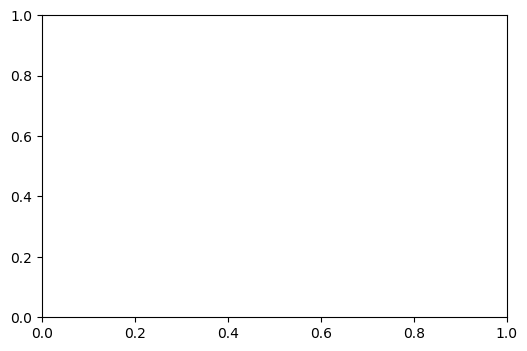

In [10]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML 

rc('animation', html='jshtml')

fig = plt.figure(figsize=(6.0,4.0), dpi=100)
ax = fig.add_subplot(111)

x = np.linspace(0,1,11)
t = np.linspace(0,0.4,101)

In [13]:
def init():
    ax.plot([], [])
    ax.set_ylim(0, 1.5)
    ax.grid()
    ax.set_ylabel("Temperatura")
    ax.set_xlabel("Posición en la barra")
    ax.set_title("Variación de la temperatura en una barra")

def animate(i):
    del ax.lines[:]
    ax.plot(x, sol_aprox[i], color="blue", label="aprox. $t = {0:.2f}$ seg.".format(t[i]))
    ax.legend()
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=101, interval=120, repeat=True)

anim

Podemos apreciar que la temperatura desciende en el transcurrir del tiempo.